In [145]:
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
model = 'Lorenz63'
da_method = 'KF'
df = pd.read_csv('./' + model + '_' + da_method + '.csv')

In [147]:
df

,timestep,x_true,y_true,z_true,x_obs,y_obs
0,0.00,0.000000,10.000000,20.000000,None,None
1,0.01,0.948103,9.940542,19.521309,None,None
2,0.02,1.804223,9.961366,19.143549,None,None
3,0.03,2.584631,10.059677,18.857236,None,None
4,0.04,3.303708,10.231168,18.656331,None,None
5,0.05,3.974004,10.470530,18.537555,None,None
6,0.06,4.606333,10.771707,18.499810,None,None
7,0.07,5.209869,11.127965,18.543704,None,None
8,0.08,5.792241,11.531862,18.671124,None,None
9,0.09,6.359602,11.975119,18.884861,None,None


In [148]:
timestep = df[' timestep'].tolist()

In [149]:
x_true, y_true, z_true = df[' x_true'].tolist(), df[' y_true'].tolist(), df[' z_true'].tolist()

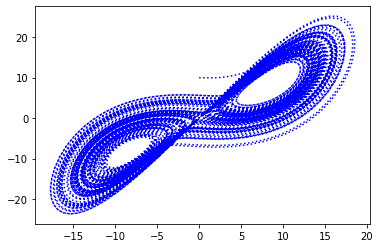

In [150]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_true[:], y_true[:], 'b:', label='True')

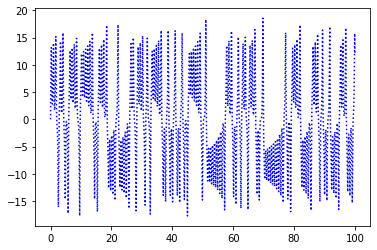

In [151]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(timestep[:], x_true[:], 'b:', label='True')